In [2]:
# %load ../src/preface.py
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from IPython.core.debugger import set_trace
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# setup matplotlib
mpl.rcParams['font.family']='monospace'
mpl.rcParams['font.monospace']='Fira Code'
mpl.rcParams['font.size']=14.0
mpl.rcParams['figure.figsize']=[8,6]



In [34]:
data = np.loadtxt("../datasets/ex1data1.txt", delimiter=',')


# add a column to X
# n is # of samples

X = data[:,0]
y = data[:,1]
n,m = data.shape
w = np.full((2,1), 0)
alpha = 0.1
# add 1's as a first column in X
X = np.hstack((np.ones(n)[:, None], X[:, None]))


def compute_cost(X, y, w):
    """
    X - feature matrix
    y - target value
    w - weights
    """
    n = len(X)
    return 1./(2*n) *  np.sum(( np.dot(X, w) - y[:,None])**2)

def gradient_descent(X, y, 
                     w = np.full((2,1), 0.), alpha=0.01, num_iters=20):
    """ return (1) cost history (2) final w """
    n = len(X)
    c = np.zeros(num_iters)
    for i in range(num_iters):
        
        c[i] = gd_update_cost(X, y, w)
        temp0 = w[0,0] - alpha /(n) * np.sum( (np.dot(X,w) - y[:,None]) * X[:,0][:,None])
        temp1 = w[1,0] - alpha /(n) * np.sum( (np.dot(X,w) - y[:,None]) * X[:,1][:,None])
        w[0,0] = temp0
        w[1,0] = temp1
        
    return c, w
            

In [25]:
c, w = gradient_descent(X,y)


'FiraCode-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


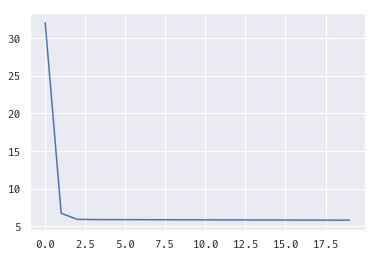

In [27]:
plt.plot(c)
plt.savefig("linear-regression-gd.pdf")

In [28]:
c

array([32.07273388,  6.73719046,  5.93159357,  5.90115471,  5.89522859,
        5.89009494,  5.88500416,  5.87993248,  5.87487909,  5.86984391,
        5.86482687,  5.85982789,  5.85484692,  5.84988389,  5.84493874,
        5.8400114 ,  5.83510181,  5.8302099 ,  5.82533562,  5.82047889])

In [29]:
w

array([[-0.06116598],
       [ 0.80780498]])

# Visualize Cost Function

6.1755817178901316


/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.


[Text(0.5, 0, '$w_1$'), Text(0.5, 0, '$w_0$')]

'FiraCode-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'FiraCode-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


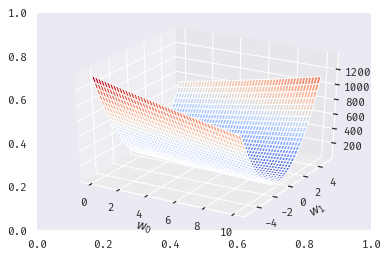

In [22]:
data = np.loadtxt("../datasets/ex1data1.txt", delimiter=',')


# add a column to X
# n is # of samples

X = data[:,0]
y = data[:,1]
n,m = data.shape

# w = np.full((2,1), 0)
# alpha = 0.1

# add 1's as a first column in X
X = np.hstack((np.ones(n)[:, None], X[:, None]))

def compute_cost(X, y, w):
    # set_trace()
    n = len(X)
    return 1./(2*n) *  np.sum(( np.dot(X, w) - y[:,None])**2)


w0 = np.linspace(0,10,50)
w1 = np.linspace(-5,5,50)

mesh0, mesh1 = np.meshgrid(w0, w1)
nr, nc = mesh0.shape  # get the shape
ycost = np.empty((nr,nc))

for i in range(nr):
    for j in range(nc):
        ycost[i,j] = compute_cost(X, y , np.array([[mesh0[i,j], mesh1[i,j]]]).T)

print(np.min(ycost))

fig, ax = plt.subplots()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(mesh0, mesh1, ycost, cmap=cm.coolwarm);
ax.set(xlabel = '$w_0$', ylabel = '$w_1$');
plt.savefig("linear-cost-gd.pdf", bbox_inches = 'tight', pad_inches=0)

# Contour

## Compute data points from mesh grid

In [14]:
data = np.loadtxt("../datasets/ex1data1.txt", delimiter=',')


# add a column to X
# n is # of samples

X = data[:,0]
y = data[:,1]
n,m = data.shape

# w = np.full((2,1), 0)
# alpha = 0.1

# add 1's as a first column in X
X = np.hstack((np.ones(n)[:, None], X[:, None]))

def compute_cost(X, y, w):
    # set_trace()
    n = len(X)
    return 1./(2*n) *  np.sum(( np.dot(X, w) - y[:,None])**2)


w0 = np.linspace(-12,12,100)
w1 = np.linspace(-4,4,100)

mesh0, mesh1 = np.meshgrid(w0, w1)
nr, nc = mesh0.shape  # get the shape
ycost = np.empty((nr,nc))

for i in range(nr):
    for j in range(nc):
        ycost[i,j] = compute_cost(X, y , np.array([[mesh0[i,j], mesh1[i,j]]]).T)

print(np.min(ycost))


4.48097721050429


'FiraCode-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'FiraCode-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


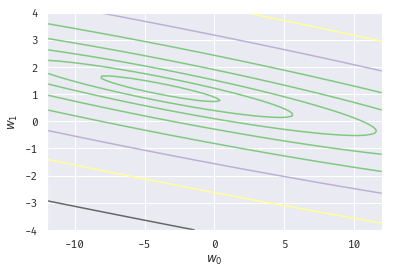

In [17]:
fig, ax = plt.subplots()
ax.contour(mesh0, mesh1, ycost, np.logspace(-3, 3, 20), cmap=cm.Accent);
ax.set_xlabel("$w_0$")
ax.set_ylabel("$w_1$")
plt.savefig("linear-cost-contour.pdf", bbox_inches = 'tight', pad_inches=0);


In [16]:
np.logspace(-3,3,20)

array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])

# Multivariate Gradient Descent

## read in data

In [68]:
# housing price @ New Orleans
# col #1: size
# col #2: number of bedrooms
# col #3: price

data = np.loadtxt("../datasets/ex1data2.txt", delimiter=',')
X = data[:,:-1] # all columns except last 
y = data[:,-1] # last columns
X.shape

(47, 2)

## normalize features

$\frac{x_i - \text{mean}(x)}{\text{std}(x)} $

In [69]:
def feature_normalize(X):
    """ normalize X, for each features present
    mu, sigma's size is same as number of features
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    return mu, sigma, (X - mu.T)/sigma.T

mu, sigma, X = feature_normalize(X)

## Add 1 as extra column

In [70]:

n,m = data.shape
# add 1's as a first column in X
X = np.hstack((np.ones(n)[:, None], X))

## Compute cost function


### non-vector form

$$ C(w) = \frac{1}{2n}\sum_{i=1}^{n} (f_w(x^{(i)} - y^{(i)})^2 $$


### vector form (this cost function doesn't seem to be right)
$$ C(w) = \frac{1}{2n} (X\cdot w - y)^T\cdot (X\cdot w - y) $$

### update $w$

$$ w \leftarrow w - \frac{\alpha}{n} \big( (X\cdot w - y)^T \cdot X \big)^T $$

In [74]:

# non-vector
def compute_cost(X, y, w):
    # set_trace()
    n = len(X)
    return 1./(2*n) *  np.sum(( np.dot(X, w) - y[:,None])**2)


##
## X.shape (n, m+1)  w.shape (m+1,1), y.shape (n,1)
##
## np.dot(X, w) = (n, 1)
## 
## temp = np.dot(X,w) - y -> (n,1)
##
## temp.T  = (1,n)
##
## np.dot(temp.T, temp) -> (n,n)
##
##
def compute_cost2(X, y , w):
    n = len(X)
    temp = np.dot(X,w)-y
    return 1./(2*n)*np.dot(temp.T, temp)

X.shape

(47, 3)

In [72]:
w = np.array([[0,0,0]]).T
compute_cost(X,y,w)

65591548106.45744

In [78]:
compute_cost2(X,y,w).shape

(47, 47)

## Compute Gradient Descent

In [29]:
def gradient_descentv2(X, y, alpha=0.01, num_iters=1500):
    """ do gradient deswcent on any feature matrix """
    n, m  = X.shape
    c = np.zeros(num_iters)
    w = np.full((m, 1), 0.0)  # initialize w
    temp = np.full((m, 1), 0.0)
    
    for i in range(num_iters):
        c[i] = compute_cost(X, y, w)
        for j in range(m):
            temp[j] = w[j] - alpha / (n) * np.sum(
                (np.dot(X, w) - y[:, None]) * X[:, j][:, None])
        w = temp 
    return c, w
    

In [30]:
n_iter = 400
c, w = gradient_descentv2(X, y, num_iters = n_iter)
print("Best cost: {} after {} iterations".format(c[-1], n_iter))
print("Weights: {}".format(w))

Best cost: 2105491157.0250847 after 400 iterations
Weights: [[334302.06399328]
 [ 99481.68355349]
 [  3171.81057889]]


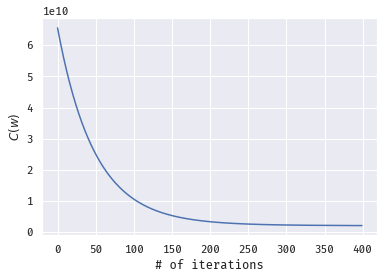

In [31]:
plt.plot(c);
plt.xlabel("# of iterations");
plt.ylabel("$C(w)$");